In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

from eddies_detection import  get_traj_with_parcels, get_traj_with_numpy, find_eddies
from eddies_tracking import eddies_tracker
from catalog import write_catalog
from plot import StreamPlot
from time import time
import numpy as np

d0 = 0
date_len = 50
stream_data_fname = "../data/data.nc"
runtime = 600
delta_time = 5
particle_grid_step = 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

## Compute the list of path

In [3]:
list_days = []

for di in range(date_len):
    t0 = time()
    traj = get_traj_with_numpy(d0+di, runtime, delta_time, particle_grid_step, stream_data_fname)
    print("Day ",di,", runtime : ",time()-t0)
    
    eddies = find_eddies(traj)
    list_days.append(eddies)

Integration: 100%|██████████| 120/120 [00:37<00:00,  3.22it/s]


Day  0 , runtime :  54.25839042663574


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.22it/s]


Day  1 , runtime :  55.23365831375122


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.30it/s]


Day  2 , runtime :  52.76532340049744


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.17it/s]


Day  3 , runtime :  54.59852838516235


Integration: 100%|██████████| 120/120 [00:40<00:00,  2.96it/s]


Day  4 , runtime :  59.114049196243286


Integration: 100%|██████████| 120/120 [00:41<00:00,  2.87it/s]


Day  5 , runtime :  59.32758164405823


Integration: 100%|██████████| 120/120 [00:38<00:00,  3.14it/s]


Day  6 , runtime :  55.09349012374878


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.23it/s]


Day  7 , runtime :  54.41893696784973


Integration: 100%|██████████| 120/120 [00:42<00:00,  2.82it/s]


Day  8 , runtime :  59.88854122161865


Integration: 100%|██████████| 120/120 [00:38<00:00,  3.11it/s]


Day  9 , runtime :  54.79917311668396


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.18it/s]


Day  10 , runtime :  54.56841778755188


Integration: 100%|██████████| 120/120 [00:38<00:00,  3.12it/s]


Day  11 , runtime :  55.94190073013306


Integration: 100%|██████████| 120/120 [00:39<00:00,  3.06it/s]


Day  12 , runtime :  57.60181522369385


Integration: 100%|██████████| 120/120 [00:38<00:00,  3.08it/s]


Day  13 , runtime :  57.610668659210205


Integration: 100%|██████████| 120/120 [00:41<00:00,  2.92it/s]


Day  14 , runtime :  60.5498366355896


Integration: 100%|██████████| 120/120 [00:45<00:00,  2.65it/s]


Day  15 , runtime :  62.86022591590881


Integration: 100%|██████████| 120/120 [00:41<00:00,  2.86it/s]


Day  16 , runtime :  59.720967292785645


Integration: 100%|██████████| 120/120 [00:40<00:00,  2.93it/s]


Day  17 , runtime :  58.67628502845764


Integration: 100%|██████████| 120/120 [00:42<00:00,  2.84it/s]


Day  18 , runtime :  60.481345653533936


Integration: 100%|██████████| 120/120 [00:42<00:00,  2.85it/s]


Day  19 , runtime :  61.832022190093994


Integration: 100%|██████████| 120/120 [00:39<00:00,  3.04it/s]


Day  20 , runtime :  57.82003951072693


Integration: 100%|██████████| 120/120 [00:44<00:00,  2.69it/s]


Day  21 , runtime :  65.84364080429077


Integration: 100%|██████████| 120/120 [00:38<00:00,  3.08it/s]


Day  22 , runtime :  59.576865434646606


Integration: 100%|██████████| 120/120 [00:39<00:00,  3.04it/s]


Day  23 , runtime :  58.32446217536926


Integration: 100%|██████████| 120/120 [00:40<00:00,  2.94it/s]


Day  24 , runtime :  57.45698595046997


Integration: 100%|██████████| 120/120 [00:41<00:00,  2.89it/s]


Day  25 , runtime :  63.11845135688782


Integration: 100%|██████████| 120/120 [00:38<00:00,  3.08it/s]


Day  26 , runtime :  56.53421878814697


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.26it/s]


Day  27 , runtime :  56.49889302253723


Integration: 100%|██████████| 120/120 [00:43<00:00,  2.73it/s]


Day  28 , runtime :  61.35425424575806


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.17it/s]


Day  29 , runtime :  56.82970142364502


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.29it/s]


Day  30 , runtime :  52.65628242492676


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.19it/s]


Day  31 , runtime :  55.13603091239929


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.28it/s]


Day  32 , runtime :  55.720203161239624


Integration: 100%|██████████| 120/120 [00:41<00:00,  2.88it/s]


Day  33 , runtime :  58.7479772567749


Integration: 100%|██████████| 120/120 [00:35<00:00,  3.42it/s]


Day  34 , runtime :  51.062586307525635


Integration: 100%|██████████| 120/120 [00:35<00:00,  3.40it/s]


Day  35 , runtime :  51.89058470726013


Integration: 100%|██████████| 120/120 [00:41<00:00,  2.87it/s]


Day  36 , runtime :  58.44229245185852


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.29it/s]


Day  37 , runtime :  54.34983730316162


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.30it/s]


Day  38 , runtime :  52.330333948135376


Integration: 100%|██████████| 120/120 [00:41<00:00,  2.88it/s]


Day  39 , runtime :  58.81344819068909


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.24it/s]


Day  40 , runtime :  52.79088830947876


Integration: 100%|██████████| 120/120 [00:35<00:00,  3.34it/s]


Day  41 , runtime :  52.84897565841675


Integration: 100%|██████████| 120/120 [00:39<00:00,  3.01it/s]


Day  42 , runtime :  58.20349860191345


Integration: 100%|██████████| 120/120 [00:39<00:00,  3.01it/s]


Day  43 , runtime :  59.665300130844116


Integration: 100%|██████████| 120/120 [00:42<00:00,  2.81it/s]


Day  44 , runtime :  59.49674081802368


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.21it/s]


Day  45 , runtime :  54.16885304450989


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.29it/s]


Day  46 , runtime :  53.732581615448


Integration: 100%|██████████| 120/120 [00:43<00:00,  2.78it/s]


Day  47 , runtime :  60.469433546066284


Integration: 100%|██████████| 120/120 [00:36<00:00,  3.27it/s]


Day  48 , runtime :  52.552229166030884


Integration: 100%|██████████| 120/120 [00:37<00:00,  3.19it/s]


Day  49 , runtime :  56.061333417892456


In [4]:
import random as rd

rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

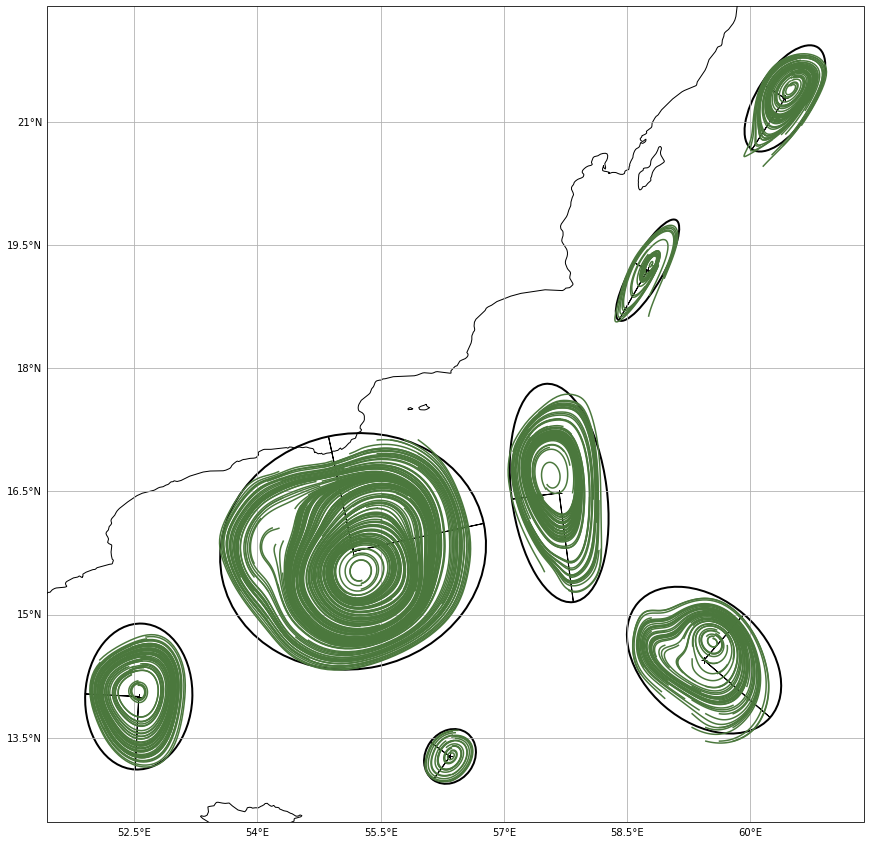

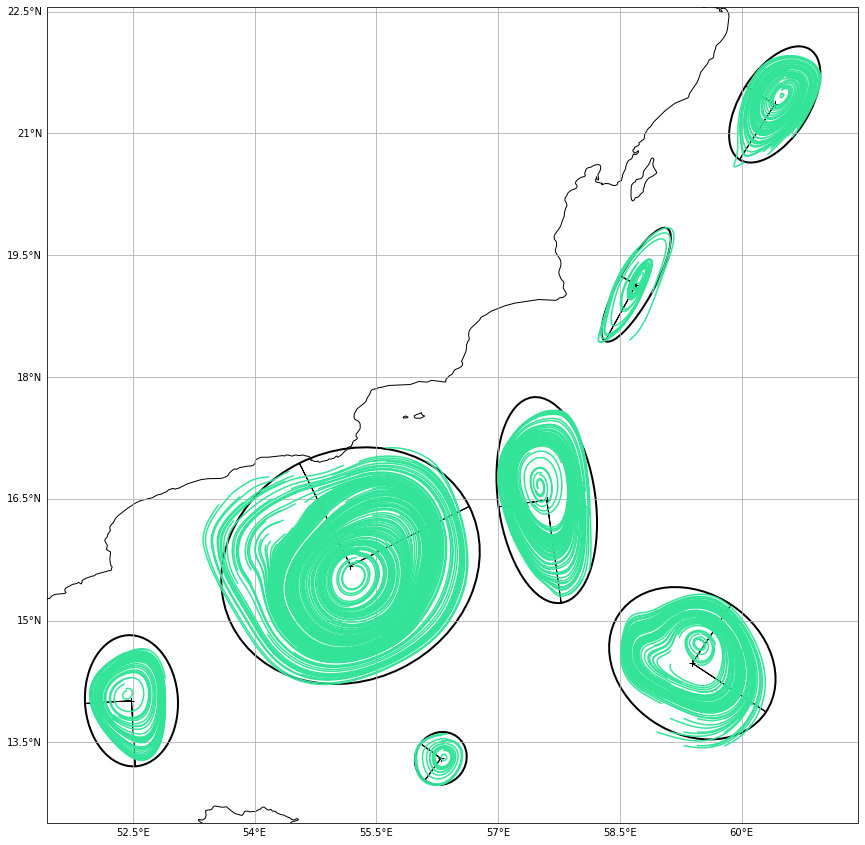

In [5]:
for eddies in list_days[:2]:
    figure = StreamPlot()
    line_style = rd_color()
    figure.plot_eddies(eddies,line_style=line_style)
    figure.show()

## Clustering

In [6]:
date_len = date_len
t0 = time()
paths = eddies_tracker(0,list_days[:date_len],nb_prev_day=8)
print("Time : ",time()-t0)

Time :  117.72229409217834


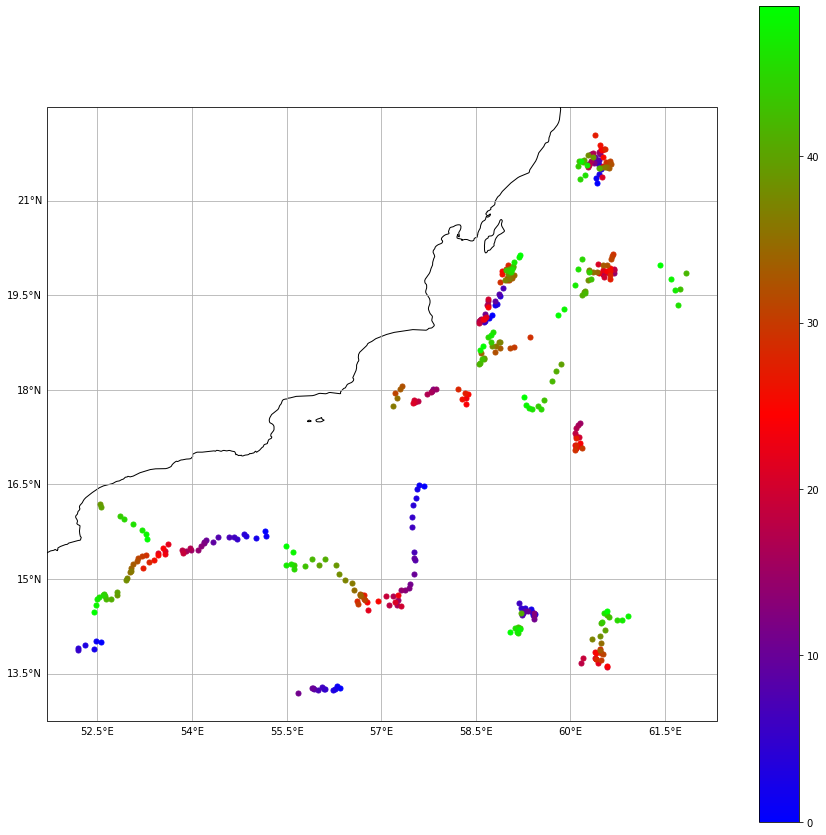

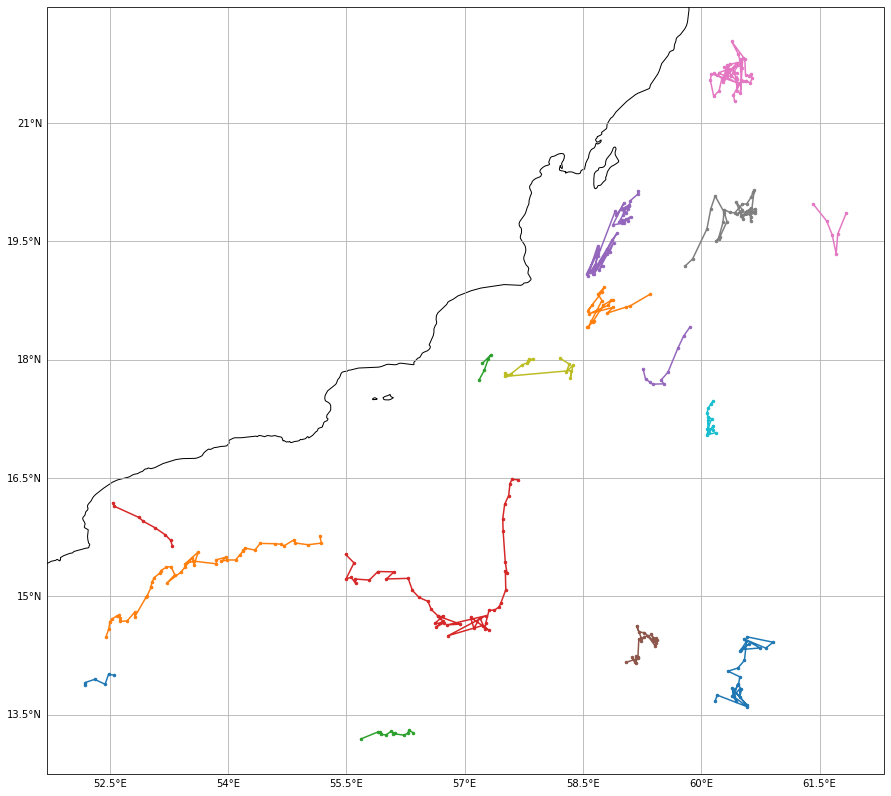

In [7]:
figure = StreamPlot()
figure.plot_catalogue(paths)
figure.show()

figure = StreamPlot()
figure.plot_eddies_trajectories(paths)
figure.show()

In [8]:
df = write_catalog(paths,fname='catalog.csv')

In [9]:
df

,date,id,center_x,center_y,a,b,angle,omega
0,0,0,52.554338,14.001118,0.434823,0.592728,3.092923,0.000005
1,0,1,55.163549,15.768687,1.084412,0.953827,0.210732,-0.000003
2,0,2,56.343692,13.272238,0.197083,0.234192,2.518268,0.000006
3,0,3,57.672730,16.479436,0.387452,0.892639,-3.011919,0.000004
4,0,4,58.748410,19.192183,0.127045,0.468414,2.622229,0.000006
...,...,...,...,...,...,...,...,...
379,49,21,58.619424,18.696157,0.329353,0.798157,2.482367,-0.000003
380,49,25,53.293055,15.638437,0.438873,0.148241,-0.563316,0.000006
381,49,29,59.262475,17.880028,0.602203,0.588684,0.465112,0.000005
382,49,30,59.042519,14.161901,0.120697,0.223999,2.461837,0.000004
